In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
Y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [4]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['Y'] = Y

In [5]:
df.head()

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs Y')

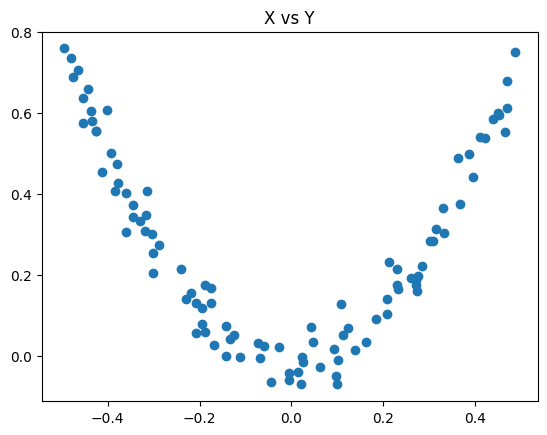

In [6]:
plt.scatter(df['X'] , df['Y'])
plt.title('X vs Y')

In [11]:
# Model 1 
df['pred1'] = df['Y'].mean()

In [12]:
df.head()

,X,Y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


In [13]:
df['res1'] = df['Y'] - df['pred1']

In [14]:
df.head()

,X,Y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


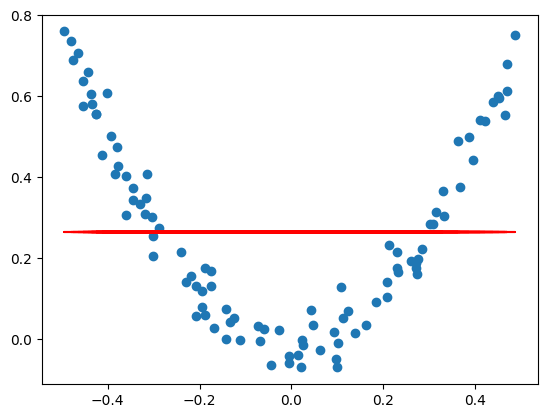

In [16]:
plt.scatter(df['X'] , df['Y'])
plt.plot(X , df['pred1'] , color='red')

In [18]:
# Model 2
from sklearn.tree import DecisionTreeRegressor 
dtr1 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr1.fit(df['X'].values.reshape(100,1) , df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

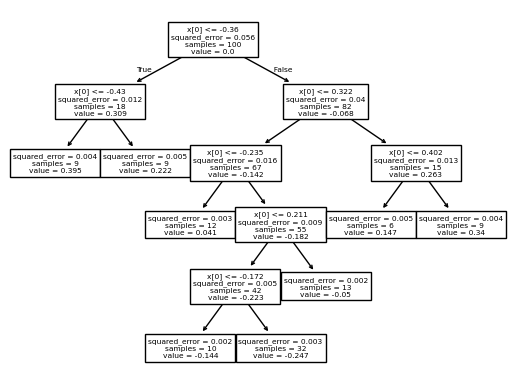

In [20]:
from sklearn.tree import plot_tree
plot_tree(dtr1)
plt.show()

In [74]:
df['pred2'] = df['pred1'][0] + (0.7)*dtr1.predict(df['X'].values.reshape(100,1))

In [75]:
df.head()

,X,Y,pred1,res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.092461,0.033253,0.014321,0.037252
1,0.450714,0.594480,0.265458,0.329021,0.503756,-0.011404,0.009959,0.584521
2,0.231994,0.166052,0.265458,-0.099407,0.230686,-0.049732,0.009959,0.156093
3,0.098658,-0.070178,0.265458,-0.335636,0.092461,-0.088497,-0.019811,-0.050367
4,-0.343981,0.343986,0.265458,0.078528,0.293813,0.038021,0.014321,0.329665


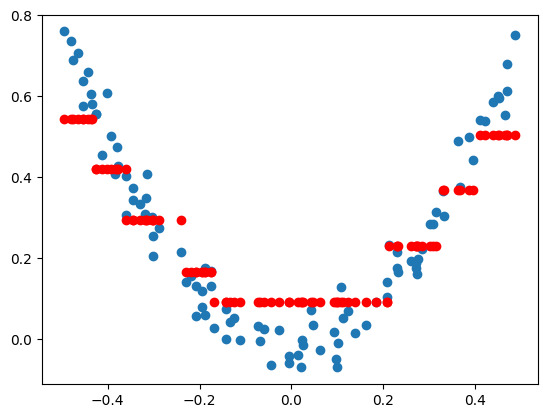

In [76]:
plt.scatter(df['X'] , df['Y'])
plt.scatter(df['X'] , df['pred2'] , color='red')

In [77]:
df['res2'] = df['Y'] - df['pred2']

In [78]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr2.fit(df['X'].values.reshape(100,1) , df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [83]:
df['pred3'] = df['pred2'][0] + (1.5)*dtr2.predict(df['X'].values.reshape(100,1))

In [84]:
df['res3'] = df['Y'] - df['pred3']

In [85]:
df.head()

,X,Y,pred1,res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.092461,-0.040888,0.015242,0.036331
1,0.450714,0.594480,0.265458,0.329021,0.503756,0.090724,0.181608,0.412872
2,0.231994,0.166052,0.265458,-0.099407,0.230686,-0.064635,0.052135,0.113917
3,0.098658,-0.070178,0.265458,-0.335636,0.092461,-0.162639,-0.070676,0.000498
4,-0.343981,0.343986,0.265458,0.078528,0.293813,0.050173,0.142571,0.201415


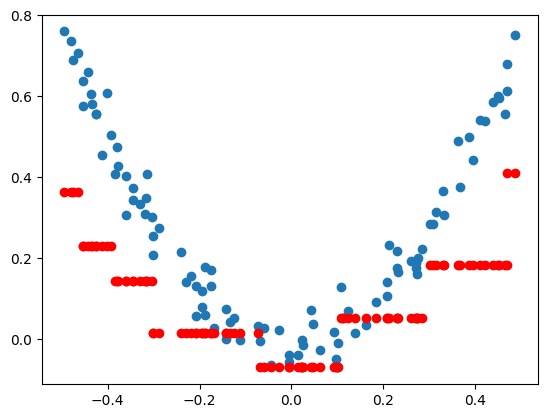

In [86]:
plt.scatter(df['X'] , df['Y'])
plt.scatter(df['X'] , df['pred3'] , color='red')